
# E- Commerce Churn Prediction

### Problem Statement
 - Customer churn has become a big issue because it costs a lot more to acquire a new customer than retaining existing ones.<br> With the use of a customer churn prediction model,  possible churners who are at high risk  can be identified, and as a result<br> Companies can take some action to prevent them from leaving.

#### Aim
- To identify factors which are responsible for customer churn.
- Prepare a model which can predict customers who are at high risk and whether a customer is going to churn or not.

#### Model we will use on this project 
- Logistics Regression because churn has only two class, 0 and 1.
- Tree based methods

## Loading libraries.

&nbsp;

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

In [2]:
df = pd.read_excel('E Commerce Dataset.xlsx',sheet_name = 1)
pd.set_option('display.max_columns', None)

- order amount hike from last year (% increase)

In [3]:
df.head(10)

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60
5,50006,1,0.0,Computer,1,22.0,Debit Card,Female,3.0,5,Mobile Phone,5,Single,2,1,22.0,4.0,6.0,7.0,139.19
6,50007,1,NaN,Phone,3,11.0,Cash on Delivery,Male,2.0,3,Laptop & Accessory,2,Divorced,4,0,14.0,0.0,1.0,0.0,120.86
7,50008,1,NaN,Phone,1,6.0,CC,Male,3.0,3,Mobile,2,Divorced,3,1,16.0,2.0,2.0,0.0,122.93
8,50009,1,13.0,Phone,3,9.0,E wallet,Male,NaN,4,Mobile,3,Divorced,2,1,14.0,0.0,1.0,2.0,126.83
9,50010,1,NaN,Phone,1,31.0,Debit Card,Male,2.0,5,Mobile,3,Single,2,0,12.0,1.0,1.0,1.0,122.93


In [4]:
df.shape

(5630, 20)

&nbsp;

# Data Exploration
***

In [5]:
df.shape 

(5630, 20)

In [6]:
for i in df.columns:
    print(i)

CustomerID
Churn
Tenure
PreferredLoginDevice
CityTier
WarehouseToHome
PreferredPaymentMode
Gender
HourSpendOnApp
NumberOfDeviceRegistered
PreferedOrderCat
SatisfactionScore
MaritalStatus
NumberOfAddress
Complain
OrderAmountHikeFromlastYear
CouponUsed
OrderCount
DaySinceLastOrder
CashbackAmount


### Assumption 
- __Tenure is in month.__
- __Ware House to Home is in km.__

In [7]:
df.isnull().sum()

CustomerID                       0
Churn                            0
Tenure                         264
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64

In [8]:

for i in df.columns:
    if df[i].dtype == "object":
        print(i)
        print()
        print('the values are:') 
        print(df[i].value_counts())
        print()
        print()

PreferredLoginDevice

the values are:
Mobile Phone    2765
Computer        1634
Phone           1231
Name: PreferredLoginDevice, dtype: int64


PreferredPaymentMode

the values are:
Debit Card          2314
Credit Card         1501
E wallet             614
UPI                  414
COD                  365
CC                   273
Cash on Delivery     149
Name: PreferredPaymentMode, dtype: int64


Gender

the values are:
Male      3384
Female    2246
Name: Gender, dtype: int64


PreferedOrderCat

the values are:
Laptop & Accessory    2050
Mobile Phone          1271
Fashion                826
Mobile                 809
Grocery                410
Others                 264
Name: PreferedOrderCat, dtype: int64


MaritalStatus

the values are:
Married     2986
Single      1796
Divorced     848
Name: MaritalStatus, dtype: int64




In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Churn', ylabel='count'>

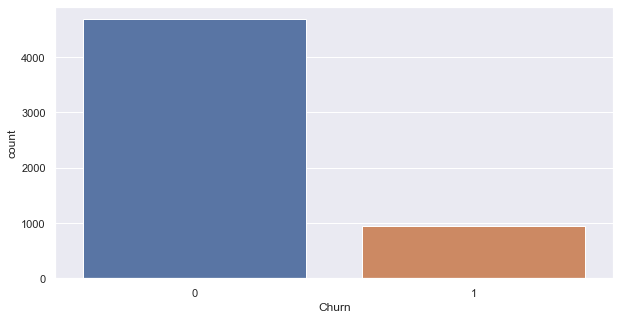

In [10]:
sns.set(rc={'figure.figsize':(10,5)})
sns.countplot('Churn', data = df)

## Similar Category in columns
********
- __In prefered login device, Mobile phone and phone are same.__
- __In preferd Payment mode, cc and credit card , cod and cash on delivery are same.__
- __In prefered order category, mobile phone and mobile are same.__



## Missing values (almost 4-5 % missing values in each of the below columns)
*******
- Tenure  __dtype - float__
- Warehouse to home  __dtype - float__
- Hour Spend On App   __dtype - float__
- Order Amount Hike From Last Year   __dtype - float__
- Coupon Used   __dtype - float__
- Order Count   __dtype - float__
- Day Since Last order    __dtype - float__


&nbsp;

&nbsp;

## Treating similar category 

In [11]:
df["PreferredLoginDevice"] = df.PreferredLoginDevice.replace(to_replace = "Phone", value = "Mobile Phone")

In [12]:
df["PreferredPaymentMode"] = df.PreferredPaymentMode.replace(to_replace = ["Cash on Delivery","CC"], value = ["COD", "Credit Card"])

In [13]:
df["PreferedOrderCat"] = df.PreferedOrderCat.replace(to_replace = "Mobile", value = "Mobile Phone")

In [14]:
for i in df.columns:
    if df[i].dtype == "object":
        print(i)
        print()
        print('the values are:') 
        print(df[i].value_counts())
        print()
        print()

PreferredLoginDevice

the values are:
Mobile Phone    3996
Computer        1634
Name: PreferredLoginDevice, dtype: int64


PreferredPaymentMode

the values are:
Debit Card     2314
Credit Card    1774
E wallet        614
COD             514
UPI             414
Name: PreferredPaymentMode, dtype: int64


Gender

the values are:
Male      3384
Female    2246
Name: Gender, dtype: int64


PreferedOrderCat

the values are:
Mobile Phone          2080
Laptop & Accessory    2050
Fashion                826
Grocery                410
Others                 264
Name: PreferedOrderCat, dtype: int64


MaritalStatus

the values are:
Married     2986
Single      1796
Divorced     848
Name: MaritalStatus, dtype: int64




<AxesSubplot:>

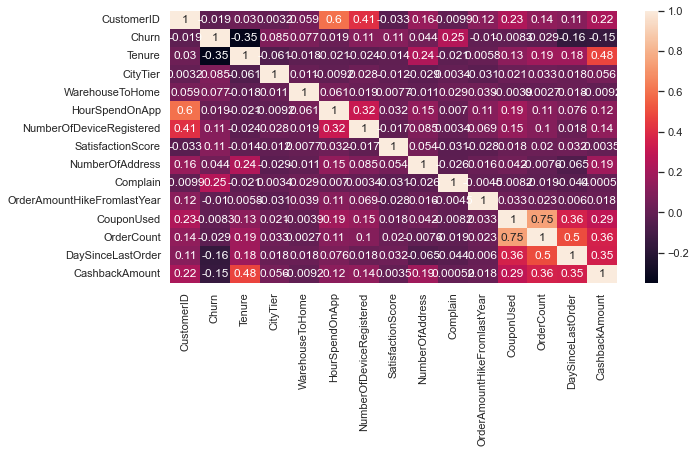

In [15]:
sns.heatmap(df.corr(), annot = True)

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='WarehouseToHome', ylabel='count'>

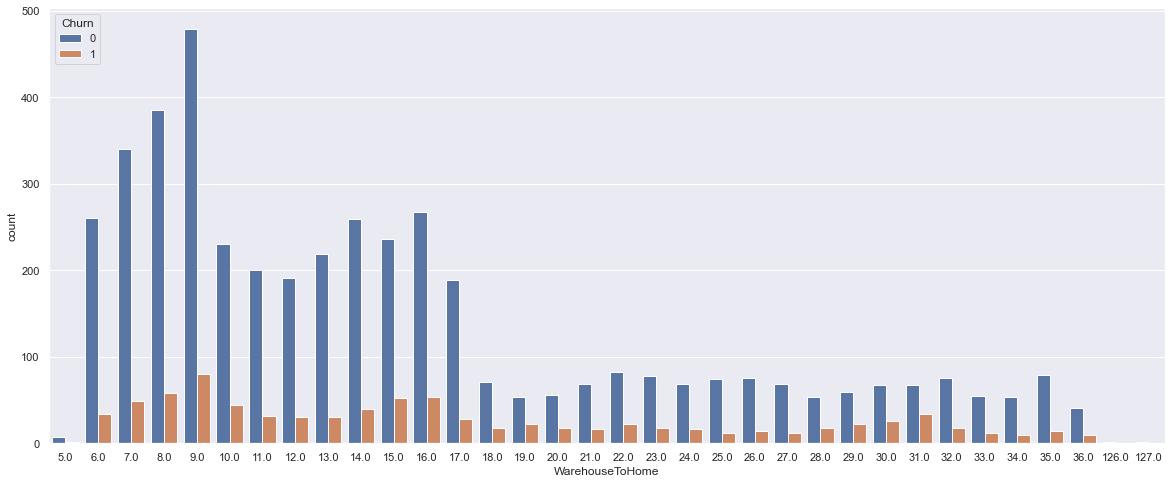

In [16]:
sns.set(rc={'figure.figsize':(20,8)})
sns.countplot('WarehouseToHome',data = df, hue = 'Churn')

#### More than 70% of the deliveries are made at a distance of less than equals to 18kms  between warehouse and homes.

&nbsp;

In [17]:
df[df['WarehouseToHome']>18.0].shape

(1492, 20)

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Tenure', ylabel='count'>

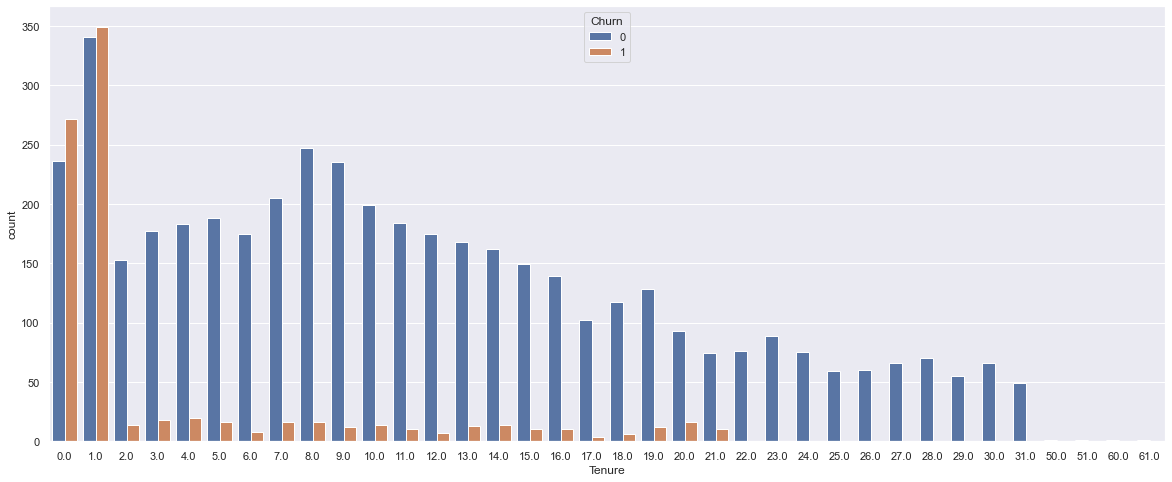

In [18]:
sns.countplot('Tenure', hue = 'Churn',data=df)

#### It shows that newbies are churning the most.so company should focus more on new customers for atleat 2 month because they churn within 2 months as compared to old ones.
#### old customers whose tenure are more than 21 months are not churning that shows their loyalty.
#### new customers are more as compared to old ones i.e loyal ones.



&nbsp;

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Gender', ylabel='count'>

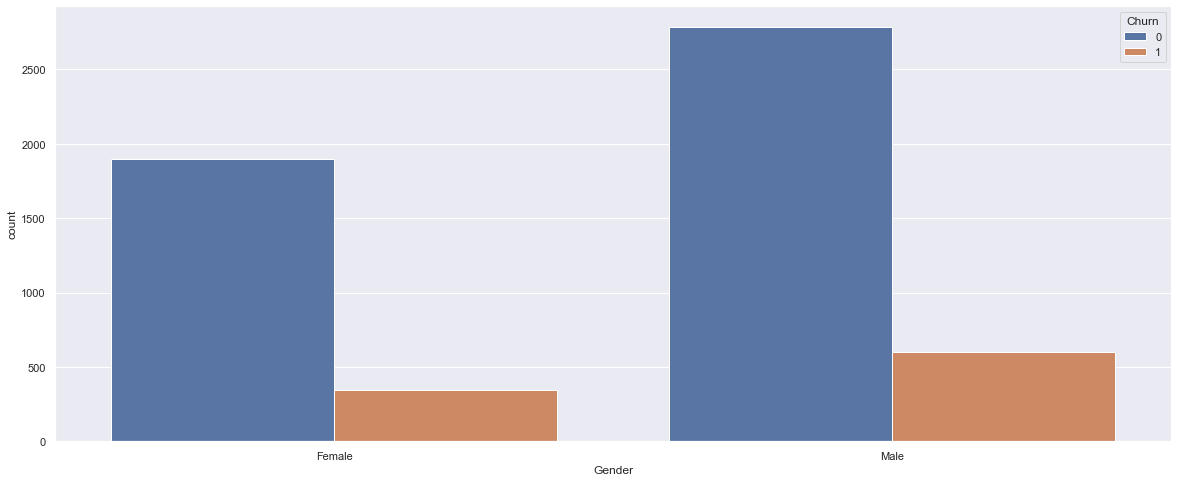

In [19]:
sns.countplot('Gender', hue = 'Churn',data=df)

In [20]:
df.groupby(['Gender','Churn']).size()

Gender  Churn
Female  0        1898
        1         348
Male    0        2784
        1         600
dtype: int64

#### 15.5 % women churn
#### 17.7% male churn

&nbsp;

In [21]:
ab = df.groupby('CityTier').size().reset_index().rename(columns={0:'Count'})
ab

,CityTier,Count
0,1,3666
1,2,242
2,3,1722


In [22]:
ab['Percent'] = (ab['Count']/ab['Count'].sum())*100

In [23]:
ab

,CityTier,Count,Percent
0,1,3666,65.115453
1,2,242,4.298401
2,3,1722,30.586146


C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Tenure', ylabel='count'>

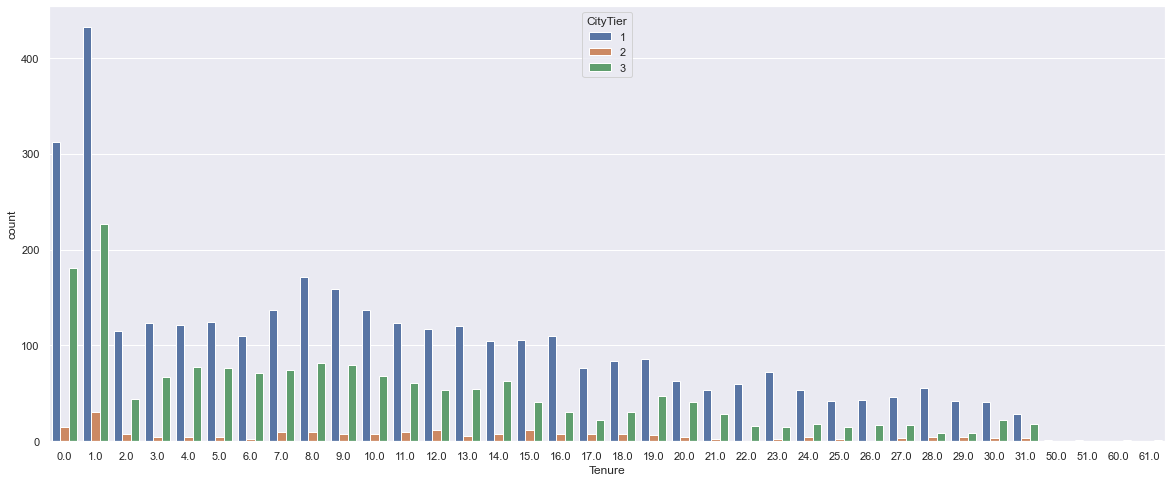

In [24]:
sns.countplot('Tenure', hue = 'CityTier', data = df)

&nbsp;

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='OrderCount', ylabel='count'>

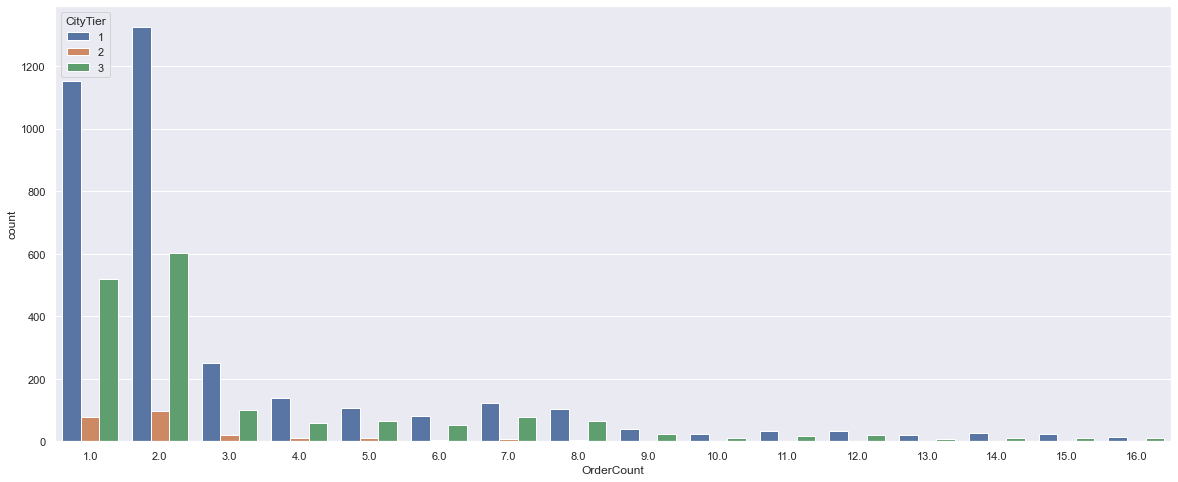

In [25]:
sns.countplot('OrderCount', hue = 'CityTier', data = df)

#### Most of the Traffic on the website is from Tier 1 cities followed by Tier 3 and Tier 2(very less)

&nbsp;

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='CityTier', ylabel='count'>

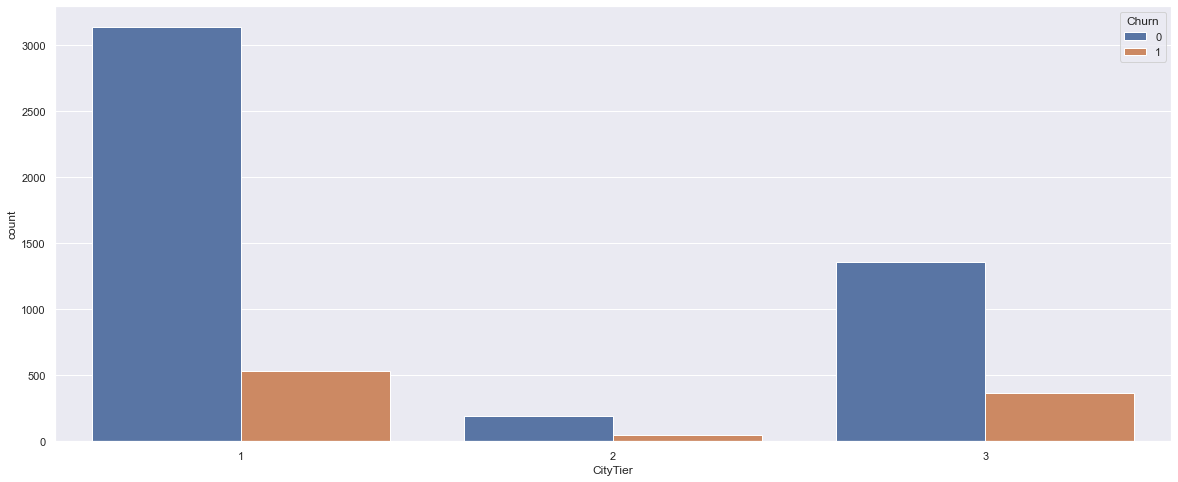

In [26]:
sns.countplot('CityTier', hue = 'Churn', data = df)

In [27]:
df.groupby(['CityTier','Churn']).size().reset_index()

,CityTier,Churn,0
0,1,0,3134
1,1,1,532
2,2,0,194
3,2,1,48
4,3,0,1354
5,3,1,368


#### Churn rate on the basis of City Tier
- __Tier 1 - 15%__
- __Tier 2 - 19%__
- __Tier 3 - 21%__



&nbsp;

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='SatisfactionScore', ylabel='count'>

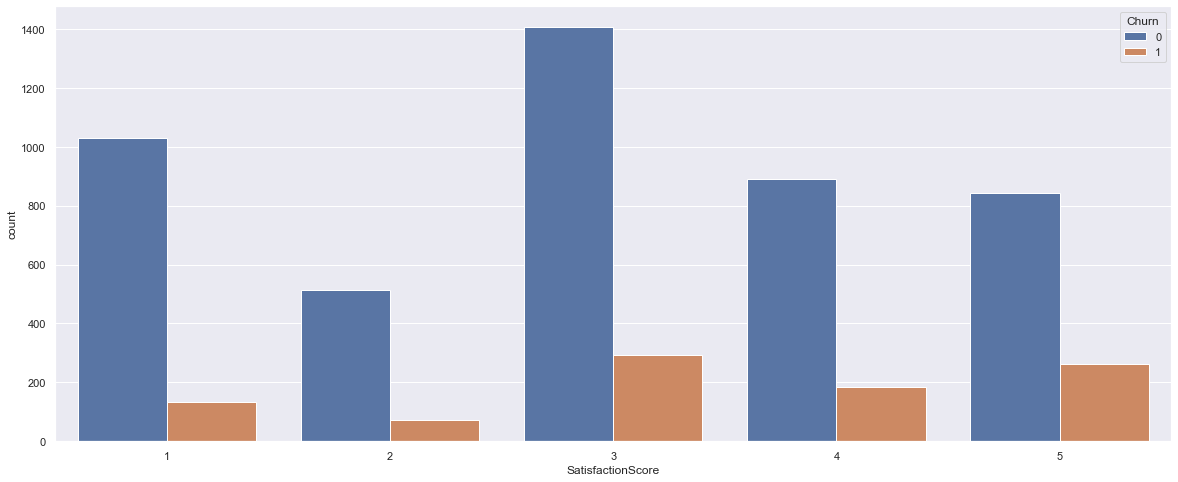

In [28]:
sns.countplot('SatisfactionScore', hue = 'Churn', data = df)

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Tenure', ylabel='count'>

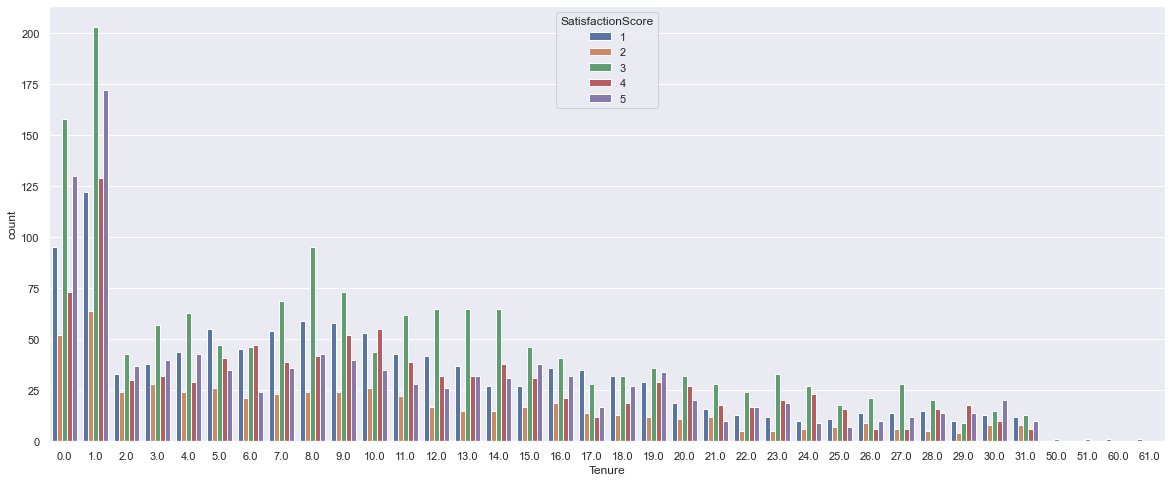

In [29]:
sns.countplot('Tenure', hue = 'SatisfactionScore', data = df)

In [30]:
df1 = df[(df.SatisfactionScore>=3) & (df.Tenure <= 1.0)]

In [31]:
df1.groupby(['SatisfactionScore','Churn']).size()

SatisfactionScore  Churn
3                  0        171
                   1        190
4                  0         95
                   1        107
5                  0        116
                   1        186
dtype: int64

#### df1 are the df of new cutomers i.e (0,1 months) who are satisfied.

&nbsp;

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='SatisfactionScore', ylabel='count'>

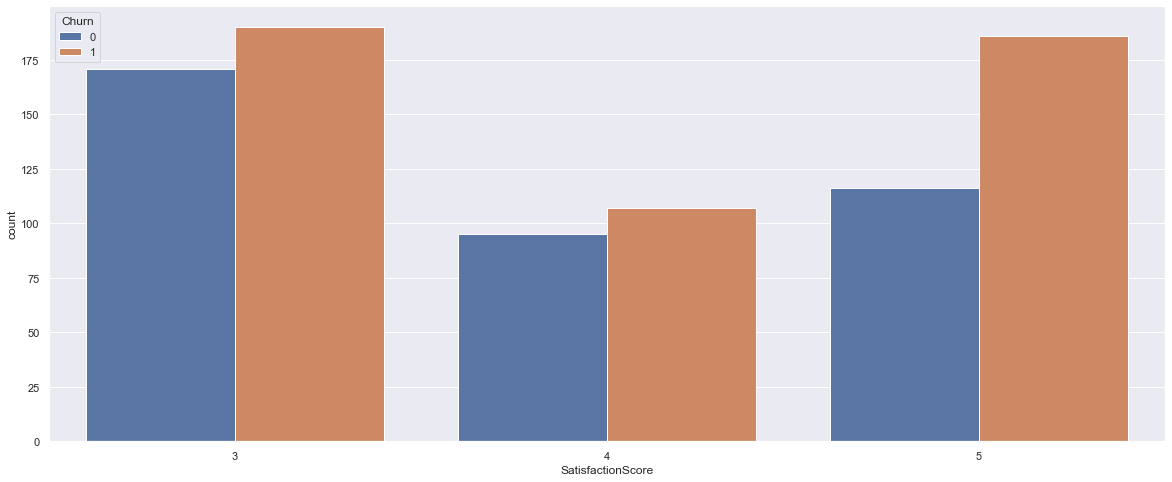

In [32]:
sns.countplot('SatisfactionScore', hue = 'Churn', data = df1)

 ####  There are 1198 new customers out of which 865 are the satistfied customers.i.e  72% new cusotmers are satisfied   (df1)
 ####  483 people out of 865 churn i.e 55% 

- Might be the incentive due to which the people were connected with the website discontinued.

#### df2 - new customers

In [33]:
df2 = df[df['Tenure']<= 1.0]

In [34]:
df2.shape

(1198, 20)

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Churn', ylabel='count'>

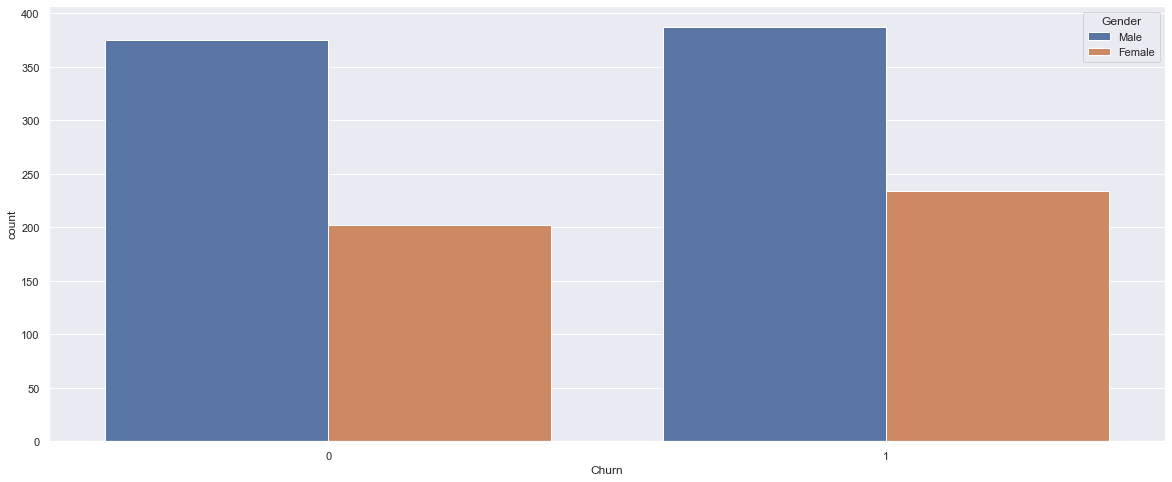

In [35]:
sns.countplot('Churn',hue = 'Gender',data = df2)

In [36]:
df2.groupby(['Churn','Gender']).size()

Churn  Gender
0      Female    202
       Male      375
1      Female    234
       Male      387
dtype: int64

#### Among the new customers(Tenure <=1) the churn rate is as follows (df2)
- Female 54% 
- Male 51%

&nbsp;

#### Single people

In [37]:
df3 = df[df['MaritalStatus']== 'Single']

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Gender', ylabel='count'>

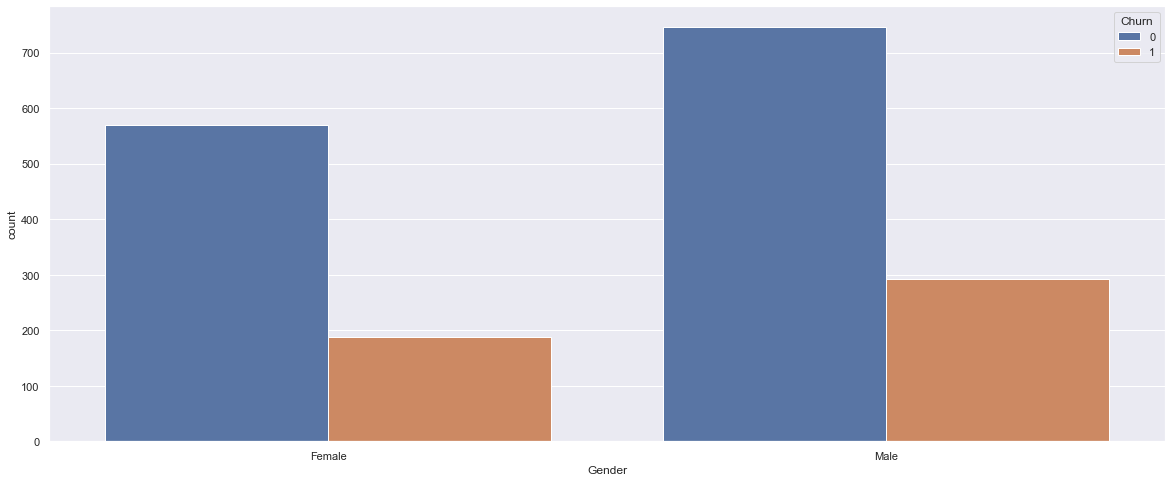

In [38]:
sns.countplot('Gender', hue = 'Churn',data= df3)

In [39]:
df3.groupby(['Gender','Churn']).size()

Gender  Churn
Female  0        570
        1        188
Male    0        746
        1        292
dtype: int64

#### Among the Unmarried Customers the churn rate is as follows(df3)
- Female 25%
- Male 28%
- 27% Unmarried customers Churn

&nbsp;

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='MaritalStatus', ylabel='count'>

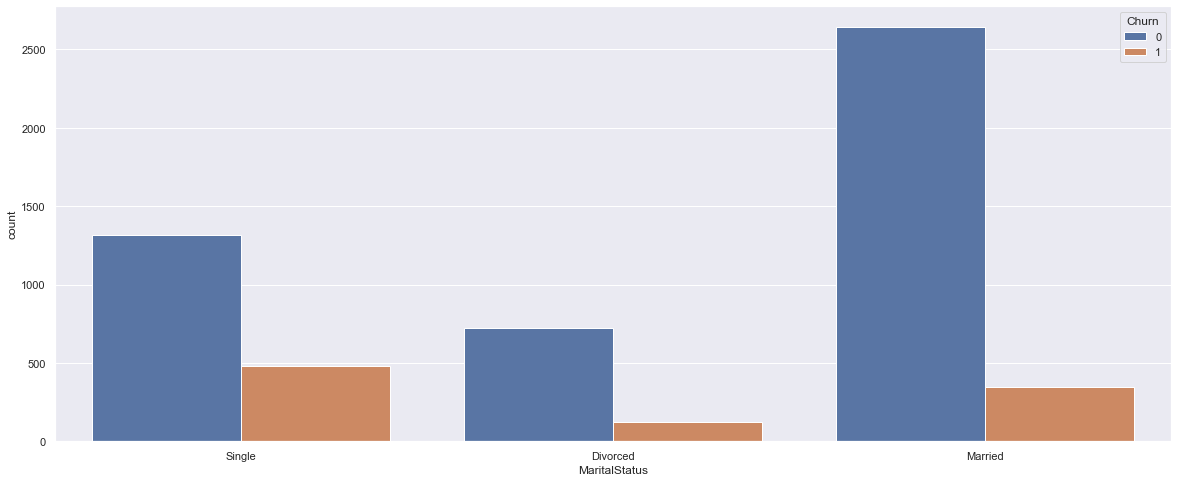

In [40]:
sns.countplot('MaritalStatus', hue = 'Churn', data = df)

In [41]:
df.groupby(['MaritalStatus','Churn']).size()

MaritalStatus  Churn
Divorced       0         724
               1         124
Married        0        2642
               1         344
Single         0        1316
               1         480
dtype: int64

#### Churn rate among the categories according to the marital Status are ( df)
- Divorced - 15%
- Married - 12%
- Single - 27%

&nbsp;

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Complain', ylabel='count'>

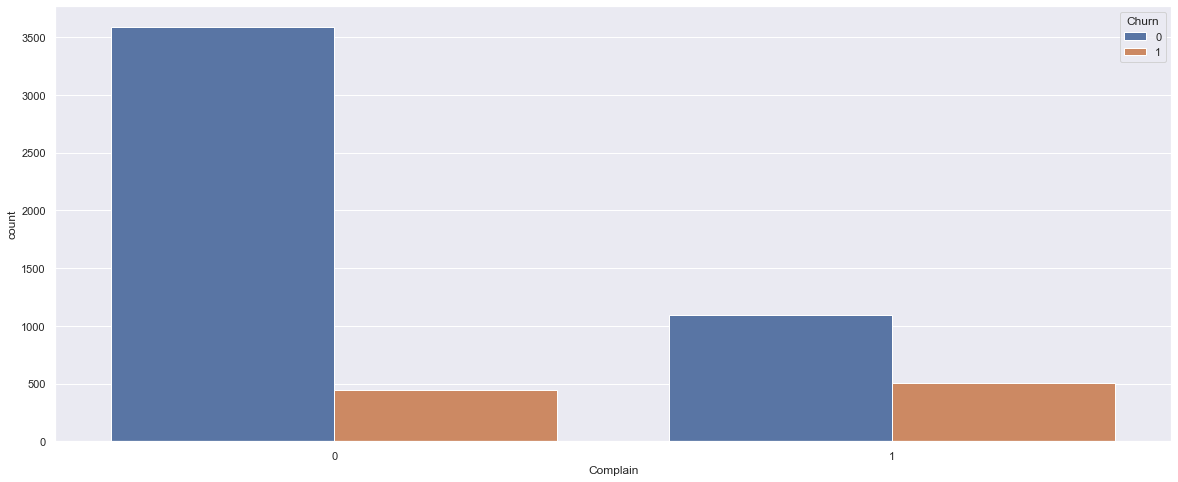

In [42]:
sns.countplot('Complain', hue = 'Churn', data = df)

&nbsp;

In [43]:
df.groupby(['Gender','PreferedOrderCat','MaritalStatus']).size()

Gender  PreferedOrderCat    MaritalStatus
Female  Fashion             Divorced          66
                            Married          188
                            Single           100
        Grocery             Divorced          40
                            Married          104
                            Single            54
        Laptop & Accessory  Divorced         132
                            Married          442
                            Single           270
        Mobile Phone        Divorced          94
                            Married          354
                            Single           316
        Others              Divorced          16
                            Married           52
                            Single            18
Male    Fashion             Divorced          60
                            Married          278
                            Single           134
        Grocery             Divorced          42
                           

- #### Men order more fashion product than women.
    - Married men are more in numbers followed by single.
    - average hours spend on app for male and female are almost same.<br> It may happen that men's id is used by their wives.


- more no of device registered in male id than female.

&nbsp;

&nbsp;

&nbsp;

## Skewess Detection and Treatment

In [44]:
df.skew(axis =0)

C:\Users\ASUS\AppData\Local\Temp/ipykernel_8828/2290083512.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.skew(axis =0)


CustomerID                     0.000000
Churn                          1.772843
Tenure                         0.736513
CityTier                       0.735326
WarehouseToHome                1.619154
HourSpendOnApp                -0.027213
NumberOfDeviceRegistered      -0.396969
SatisfactionScore             -0.142626
NumberOfAddress                1.088639
Complain                       0.953347
OrderAmountHikeFromlastYear    0.790785
CouponUsed                     2.545653
OrderCount                     2.196414
DaySinceLastOrder              1.191000
CashbackAmount                 1.149846
dtype: float64

#### Skewness
- If the skewness is between -0.5 and 0.5, the data are fairly symmetrical
- If the skewness is between -1 and — 0.5 or between 0.5 and 1, the data are moderately skewed
- If the skewness is less than -1 or greater than 1, the data are highly skewed

&nbsp;

In [45]:
Skew_col = ['Tenure','WarehouseToHome','NumberOfAddress','OrderAmountHikeFromlastYear','OrderCount','DaySinceLastOrder','CashbackAmount']

In [46]:
print("Before Transformation")
print("")
for col in Skew_col: 
        print("Skewness of {} column is {}".format(col,df[col].skew()))
#     sns.distplot(df[col])
#     plt.show()
    

Before Transformation

Skewness of Tenure column is 0.7365133838993447
Skewness of WarehouseToHome column is 1.619153668208649
Skewness of NumberOfAddress column is 1.0886393829995942
Skewness of OrderAmountHikeFromlastYear column is 0.7907853590510951
Skewness of OrderCount column is 2.196414108096659
Skewness of DaySinceLastOrder column is 1.1909995034566865
Skewness of CashbackAmount column is 1.1498457194574931


&nbsp;

In [47]:
print("After Transformation")
print("")
for i in Skew_col:
    df[i] = np.log(df[i]+1)
    print("Skewness of {} column  is {}".format(i,df[i].skew()))
#     sns.distplot(df[i])
#     plt.show()

After Transformation

Skewness of Tenure column  is -0.5880197463521784
Skewness of WarehouseToHome column  is 0.2907681080870872
Skewness of NumberOfAddress column  is 0.23416459112496113
Skewness of OrderAmountHikeFromlastYear column  is 0.46713314976255094
Skewness of OrderCount column  is 1.1267677155132116
Skewness of DaySinceLastOrder column  is -0.3892436356794331
Skewness of CashbackAmount column  is -3.779430484873208


- Log tranformation works better than Square root transformation.

### Outliers Detection and Treatment 

#### Throuh Inter Quantile range , there are 1166 rows in which outliers are present.(almost 28%)
- it is not worth to drop outliers as size of data is already small.
- Replacing value more than upper bound and less than lower bound with upper bound and lower bound respectively.

In [48]:
df.describe()

,CustomerID,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
count,5630.000000,5630.000000,5366.000000,5630.000000,5379.000000,5375.000000,5630.000000,5630.000000,5630.000000,5630.000000,5365.000000,5374.000000,5372.000000,5323.000000,5630.000000
mean,52815.500000,0.168384,2.003497,1.654707,2.694579,2.931535,3.688988,3.066785,1.538984,0.284902,2.793219,1.751023,1.211068,1.475356,5.146199
std,1625.385339,0.374240,1.029303,0.915389,0.477510,0.721926,1.023999,1.380194,0.469154,0.451408,0.209855,1.894621,0.543378,0.729738,0.290977
min,50001.000000,0.000000,0.000000,1.000000,1.791759,0.000000,1.000000,1.000000,0.693147,0.000000,2.484907,0.000000,0.693147,0.000000,0.000000
25%,51408.250000,0.000000,1.098612,1.000000,2.302585,2.000000,3.000000,2.000000,1.098612,0.000000,2.639057,1.000000,0.693147,1.098612,4.988867
50%,52815.500000,0.000000,2.302585,1.000000,2.708050,3.000000,4.000000,3.000000,1.386294,0.000000,2.772589,1.000000,1.098612,1.386294,5.101572
75%,54222.750000,0.000000,2.833213,3.000000,3.044522,3.000000,4.000000,4.000000,1.945910,1.000000,2.944439,2.000000,1.386294,2.079442,5.285194
max,55630.000000,1.000000,4.127134,3.000000,4.852030,5.000000,6.000000,5.000000,3.135494,1.000000,3.295837,16.000000,2.833213,3.850148,5.786867


In [49]:
columns = ['Tenure','WarehouseToHome','HourSpendOnApp','NumberOfDeviceRegistered','NumberOfAddress','OrderAmountHikeFromlastYear','CouponUsed','OrderCount','DaySinceLastOrder','CashbackAmount']

In [50]:
def outliers(df,feature):
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    
    IQR = Q3 - Q1
    
    Lower_bound = Q1-1.5*IQR
    Upper_bound = Q3+1.5*IQR
    
    outl_index = df.index[(df[feature]<Lower_bound) | (df[feature]>Upper_bound)]
    return outl_index
    

In [51]:
index_mul_colmn = []
for i in columns:
    index_mul_colmn.extend(outliers(df,i))
    

In [52]:
Sorted_lst = sorted(set(index_mul_colmn))

In [53]:
len(Sorted_lst)

1166

&nbsp;

In [54]:
def Trans_outliers(df,feature):
    for col in feature:
        
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
    
        IQR = Q3 - Q1
    
        Lower_bound = Q1-1.5*IQR
        Upper_bound = Q3+1.5*IQR
    
        df[col] = np.where((df[col]<Lower_bound) ,Lower_bound,df[col])
        df[col] = np.where((df[col]>Upper_bound) ,Upper_bound,df[col])

In [55]:
Trans_outliers(df,columns)

In [56]:
df.describe()

,CustomerID,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
count,5630.000000,5630.000000,5366.000000,5630.000000,5379.000000,5375.000000,5630.000000,5630.000000,5630.000000,5630.000000,5365.000000,5374.000000,5372.000000,5323.000000,5630.000000
mean,52815.500000,0.168384,2.003497,1.654707,2.694323,2.931535,3.695471,3.066785,1.538984,0.284902,2.793219,1.461388,1.202161,1.475299,5.150204
std,1625.385339,0.374240,1.029303,0.915389,0.476536,0.720184,0.942015,1.380194,0.469154,0.451408,0.209855,1.092096,0.520643,0.729567,0.247485
min,50001.000000,0.000000,0.000000,1.000000,1.791759,0.500000,1.500000,1.000000,0.693147,0.000000,2.484907,0.000000,0.693147,0.000000,4.544376
25%,51408.250000,0.000000,1.098612,1.000000,2.302585,2.000000,3.000000,2.000000,1.098612,0.000000,2.639057,1.000000,0.693147,1.098612,4.988867
50%,52815.500000,0.000000,2.302585,1.000000,2.708050,3.000000,4.000000,3.000000,1.386294,0.000000,2.772589,1.000000,1.098612,1.386294,5.101572
75%,54222.750000,0.000000,2.833213,3.000000,3.044522,3.000000,4.000000,4.000000,1.945910,1.000000,2.944439,2.000000,1.386294,2.079442,5.285194
max,55630.000000,1.000000,4.127134,3.000000,4.157428,4.500000,5.500000,5.000000,3.135494,1.000000,3.295837,3.500000,2.426015,3.550685,5.729685


&nbsp;

# Treating null values using Knn imputer

In [57]:
df.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,1.609438,Mobile Phone,3,1.945910,Debit Card,Female,3.0,3.0,Laptop & Accessory,2,Single,2.302585,1,2.484907,1.0,0.693147,1.791759,5.080969
1,50002,1,NaN,Mobile Phone,1,2.197225,UPI,Male,3.0,4.0,Mobile Phone,3,Single,2.079442,1,2.772589,0.0,0.693147,0.000000,4.803201
2,50003,1,NaN,Mobile Phone,1,3.433987,Debit Card,Male,2.0,4.0,Mobile Phone,3,Single,1.945910,1,2.708050,0.0,0.693147,1.386294,4.798102
3,50004,1,0.000000,Mobile Phone,3,2.772589,Debit Card,Male,2.0,4.0,Laptop & Accessory,5,Single,2.197225,0,3.178054,0.0,0.693147,1.386294,4.905793
4,50005,1,0.000000,Mobile Phone,1,2.564949,Credit Card,Male,NaN,3.0,Mobile Phone,5,Single,1.386294,0,2.484907,1.0,0.693147,1.386294,4.872139


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   float64
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

In [59]:
df = pd.get_dummies(df, drop_first = True)

In [60]:
df.head()

,CustomerID,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount,PreferredLoginDevice_Mobile Phone,PreferredPaymentMode_Credit Card,PreferredPaymentMode_Debit Card,PreferredPaymentMode_E wallet,PreferredPaymentMode_UPI,Gender_Male,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile Phone,PreferedOrderCat_Others,MaritalStatus_Married,MaritalStatus_Single
0,50001,1,1.609438,3,1.945910,3.0,3.0,2,2.302585,1,2.484907,1.0,0.693147,1.791759,5.080969,1,0,1,0,0,0,0,1,0,0,0,1
1,50002,1,NaN,1,2.197225,3.0,4.0,3,2.079442,1,2.772589,0.0,0.693147,0.000000,4.803201,1,0,0,0,1,1,0,0,1,0,0,1
2,50003,1,NaN,1,3.433987,2.0,4.0,3,1.945910,1,2.708050,0.0,0.693147,1.386294,4.798102,1,0,1,0,0,1,0,0,1,0,0,1
3,50004,1,0.000000,3,2.772589,2.0,4.0,5,2.197225,0,3.178054,0.0,0.693147,1.386294,4.905793,1,0,1,0,0,1,0,1,0,0,0,1
4,50005,1,0.000000,1,2.564949,NaN,3.0,5,1.386294,0,2.484907,1.0,0.693147,1.386294,4.872139,1,1,0,0,0,1,0,0,1,0,0,1


In [61]:
Y_dependent = df['Churn']

In [62]:
X_independent = df.drop(['Churn','CustomerID','OrderCount'],axis =1)

In [63]:
Y_dependent.head()

0    1
1    1
2    1
3    1
4    1
Name: Churn, dtype: int64

In [64]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

&nbsp;

__Train  validation test split__

In [65]:
x_train, x_val_test, y_train, y_val_test = train_test_split(X_independent, Y_dependent, test_size=0.30, random_state=101)

In [66]:
x_val,x_test,y_val,y_test = train_test_split(x_val_test,y_val_test,test_size = 0.50,random_state = 102)

&nbsp;

In [67]:
print(df.shape)
print(x_train.shape)
print(y_train.shape)
print(x_val.shape)
print(y_val.shape)
print(x_test.shape)
print(y_test.shape)

(5630, 27)
(3941, 24)
(3941,)
(844, 24)
(844,)
(845, 24)
(845,)


In [68]:
y_val

2089    1
3375    0
4864    0
1203    0
2665    0
       ..
3752    0
1477    1
1929    0
4593    0
589     0
Name: Churn, Length: 844, dtype: int64

__Scaling independent features__

In [69]:
scale = StandardScaler()

In [70]:
scaled_xtrain = scale.fit_transform(x_train)

In [71]:
scaled_xval = scale.transform(x_val)

In [72]:
scaled_xtest = scale.transform(x_test)

&nbsp;


In [73]:
from sklearn.impute import KNNImputer

In [74]:
imputer = KNNImputer(n_neighbors=5)

&nbsp;

In [75]:
cleaned_xtrain = imputer.fit_transform(scaled_xtrain)

In [76]:
cleaned_xval = imputer.transform(scaled_xval)

In [77]:
cleaned_xtest = imputer.transform(scaled_xtest)

&nbsp;

### Logistic Regression

__According to our problem statement, our main focus is to correctly predict customers who are going to churn.__
- so acc to problem statement, we should  focus more on to reduce false negative, so we will focus on __recall__ rather <br> than accuracy of our model.

In [78]:
from sklearn.linear_model import LogisticRegression

In [79]:
logst = LogisticRegression(penalty='l1', solver ='liblinear')

In [80]:
logst.fit(cleaned_xtrain,y_train)

LogisticRegression(penalty='l1', solver='liblinear')

In [81]:
ytrain_predicted = logst.predict(cleaned_xtrain)
yval_predicted = logst.predict(cleaned_xval)

&nbsp;

In [82]:
from sklearn.metrics import confusion_matrix,classification_report

<AxesSubplot:>

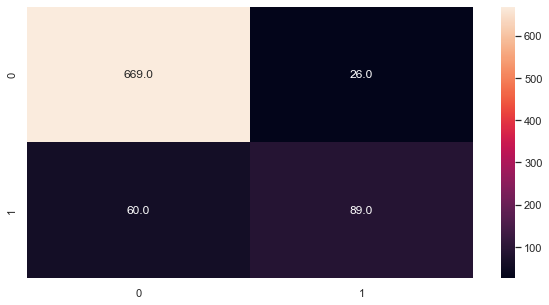

In [83]:
sns.set(rc={'figure.figsize':(10,5)})
sns.heatmap(confusion_matrix(y_val,yval_predicted), annot = True,fmt =".1f")

__On Train Data__

In [84]:
print(classification_report(y_train,ytrain_predicted, target_names=['not churn','churn']))

              precision    recall  f1-score   support

   not churn       0.92      0.97      0.94      3275
       churn       0.78      0.58      0.66       666

    accuracy                           0.90      3941
   macro avg       0.85      0.77      0.80      3941
weighted avg       0.89      0.90      0.89      3941



__On validation Data__

In [85]:
print(classification_report(y_val,yval_predicted, target_names=['not churn','churn']))

              precision    recall  f1-score   support

   not churn       0.92      0.96      0.94       695
       churn       0.77      0.60      0.67       149

    accuracy                           0.90       844
   macro avg       0.85      0.78      0.81       844
weighted avg       0.89      0.90      0.89       844



- __There is something strange, as recall of 'churn' is very less as compared to 'not churn' that proves<br> that model is baised toward mojority class.__

&nbsp;

In [86]:
print(logst.coef_)

[[-1.47484238  0.33226939  0.37254812  0.          0.38392807  0.33858004
   0.73184779  0.83311586 -0.04085939  0.3060923  -0.25059992 -0.52740991
  -0.17761613 -0.33064447 -0.2373419  -0.00580535 -0.20226278  0.18253255
   0.00931168 -0.81459766 -0.3809069   0.24695322 -0.13506145  0.33161919]]


In [87]:
import statsmodels.api as sm

In [88]:
log_reg = sm.Logit(y_train , cleaned_xtrain).fit()

Optimization terminated successfully.
         Current function value: 0.591059
         Iterations 5


In [89]:
log_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 3941
Model:                          Logit   Df Residuals:                     3917
Method:                           MLE   Df Model:                           23
Date:                Fri, 10 Jun 2022   Pseudo R-squ.:                 -0.3011
Time:                        14:28:29   Log-Likelihood:                -2329.4
converged:                       True   LL-Null:                       -1790.3
Covariance Type:            nonrobust   LLR p-value:                     1.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.7316      0.045    -16.127      0.000      -0.821      -0.643
x2             0.1461      0.043      3.381      0.001       0.061       0.231
x3             0.1510      0.037      4.132      0.000       0.079       0.223
x4            -0.0364      0.043     -0.854      0.393      -0.120       0.047
x5             0.1522      0.039      3.888      0.000       0.075       0.229
x6             0.1528      0.036      4.241      0.000       0.082       0.223
x7             0.2982      0.040      7.546      0.000       0.221       0.376
x8             0.4404      0.037     12.054      0.000       0.369       0.512
x9             0.0303      0.037      0.823      0.411      -0.042       0.102
x10            0.0804      0.041      1.970      0.049       0.000       0.160
x11           -0.1376      0.042     -3.299      0.001      -0.219      -0.056
x12           -0.2079      0.099     -2.106      0.035      -0.401      -0.014
x13           -0.0831      0.036     -2.334      0.020      -0.153      -0.013
x14           -0.2510      0.064     -3.909      0.000      -0.377      -0.125
x15           -0.2040      0.067     -3.068      0.002      -0.334      -0.074
x16           -0.0583      0.055     -1.056      0.291      -0.167       0.050
x17           -0.1252      0.048     -2.627      0.009      -0.219      -0.032
x18            0.0661      0.036      1.849      0.064      -0.004       0.136
x19            0.0539      0.048      1.123      0.262      -0.040       0.148
x20           -0.3020      0.068     -4.467      0.000      -0.434      -0.169
x21           -0.1336      0.094     -1.427      0.153      -0.317       0.050
x22            0.1281      0.050      2.570      0.010       0.030       0.226
x23           -0.0455      0.051     -0.885      0.376      -0.146       0.055
x24            0.1907      0.052      3.662      0.000       0.089       0.293
==============================================================================
"""

&nbsp;

### __Size of train and tests data__

In [90]:
pd.DataFrame(y_train).value_counts()

Churn
0        3275
1         666
dtype: int64

In [91]:
pd.DataFrame(y_val).value_counts()

Churn
0        695
1        149
dtype: int64

&nbsp;

# Performing smote on the imbalnced training dataset
- we should not use imbalanced dataset for training because it may happen that model get baised toward majority class.

  __83% are 0 and 17% are 1__
  <br>
- Since dataset are small, so we can balanced this dataset by oversampling minority class i.e creating synthetic data , it works by randomly picking a point from the minority class and computing the k-nearest neighbors for this point. The synthetic points are added between the chosen point and its neighbors.

In [92]:
from imblearn.over_sampling import SMOTE

In [93]:
sm =SMOTE(random_state =42)

In [94]:
bal_x_train,bal_y_train =sm.fit_resample(cleaned_xtrain,y_train)

In [95]:
pd.DataFrame(bal_y_train).value_counts()

Churn
0        3275
1        3275
dtype: int64

- __After performing smote, now the classes are in equall proportion__

&nbsp;

In [96]:
sm_logistic = LogisticRegression(penalty='l1',solver ='liblinear')

In [97]:
sm_logistic.fit(bal_x_train,bal_y_train)

LogisticRegression(penalty='l1', solver='liblinear')

In [98]:
ytrain_pre = sm_logistic.predict(bal_x_train)
yval_pre = sm_logistic.predict(cleaned_xval)

&nbsp;

&nbsp;

__On Train Data__

In [99]:
print(classification_report(bal_y_train,ytrain_pre))

              precision    recall  f1-score   support

           0       0.84      0.83      0.84      3275
           1       0.83      0.84      0.84      3275

    accuracy                           0.84      6550
   macro avg       0.84      0.84      0.84      6550
weighted avg       0.84      0.84      0.84      6550



__On validation Data__

In [100]:
print(classification_report(y_val,yval_pre, target_names=['not churn','churn']))

              precision    recall  f1-score   support

   not churn       0.96      0.83      0.89       695
       churn       0.51      0.85      0.64       149

    accuracy                           0.83       844
   macro avg       0.74      0.84      0.76       844
weighted avg       0.88      0.83      0.85       844



On validation data


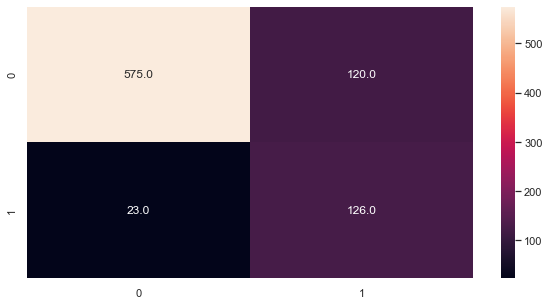

In [185]:
sns.set(rc={'figure.figsize':(10,5)})
sns.heatmap(confusion_matrix(y_val,yval_pre), annot = True,fmt =".1f")
print('On validation data')

&nbsp;

### Threshold optimization through ROC curve and Precison - Recall curve

In [102]:
yval_pred_prob = sm_logistic.predict_proba(cleaned_xval)

In [103]:
yval_pred_prob

array([[0.18794772, 0.81205228],
       [0.30866358, 0.69133642],
       [0.74690191, 0.25309809],
       ...,
       [0.96549464, 0.03450536],
       [0.30244322, 0.69755678],
       [0.98821111, 0.01178889]])

In [104]:
from sklearn.metrics import roc_curve

In [105]:
fpr,tpr,t = roc_curve(y_val,yval_pred_prob[:,-1],pos_label = 1)

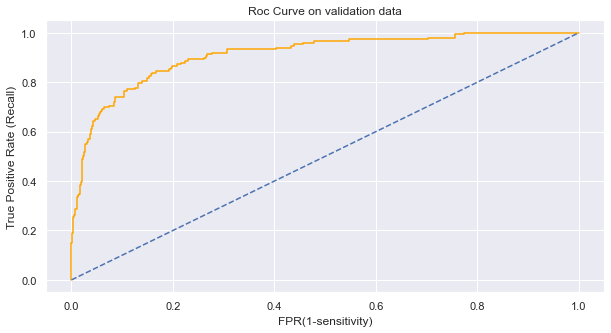

In [106]:
plt.plot(fpr,tpr,color ='orange')
plt.plot([0,1],[0,1],linestyle ='--')
plt.xlabel('FPR(1-sensitivity)')
plt.ylabel('True Positive Rate (Recall)')
plt.title('Roc Curve on validation data')
plt.show()

- Optimal Threshold totally depend on how many false positive rate we are willing to accept. its a trade off between tpr and fpr.
- Threshold 0.5 works quite well

In [107]:
ROC_data = pd.DataFrame({'FPR':fpr,'Recall':tpr,'Threshold':t})

In [181]:
# pd.set_option('display.max_row',None)
# ROC_data.head(100)

&nbsp;

In [109]:
from sklearn.metrics import precision_recall_curve
precision,recall,thresh = precision_recall_curve(y_val,yval_pred_prob[:,1],pos_label = 1)

In [176]:
Rec_pre = pd.DataFrame({'Recall':recall[:-1],'Precision':precision[:-1],'Threshold':thresh})

In [180]:
# pd.set_option('display.max_row',None)
# Rec_pre.head(835)

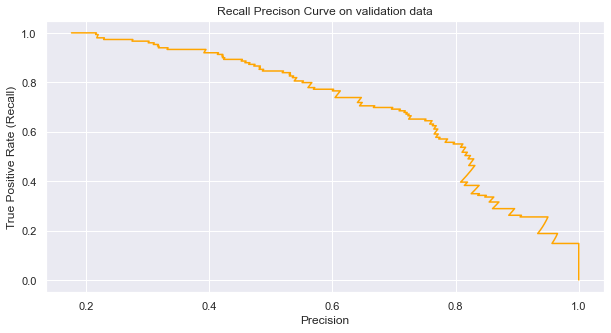

In [110]:
plt.plot(precision,recall,color ='orange')
plt.xlabel('Precision')
plt.ylabel('True Positive Rate (Recall)')
plt.title('Recall Precison Curve on validation data')
plt.show()

###  Classification report on Test data 

In [111]:
ytest_pre = sm_logistic.predict(cleaned_xtest)
print(classification_report(y_test,ytest_pre, target_names=['not churn','churn']))

              precision    recall  f1-score   support

   not churn       0.97      0.84      0.90       712
       churn       0.50      0.88      0.64       133

    accuracy                           0.84       845
   macro avg       0.74      0.86      0.77       845
weighted avg       0.90      0.84      0.86       845



In [112]:
print(y_train.shape)

(3941,)


&nbsp;

# Decision tree classifier

In [113]:
from sklearn.tree import DecisionTreeClassifier

 ### Decision Tree with default Parameter.

In [114]:
dt = DecisionTreeClassifier(random_state=98)

In [115]:
d_tree = dt.fit(bal_x_train,bal_y_train)

In [116]:
# Target prediction on test data.
dt_ytest_pred = dt.predict(cleaned_xtest)

# Target prediction on training data.
dt_ytrain_pred = dt.predict(bal_x_train)

In [117]:
# classification report on training data.
print(classification_report(bal_y_train,dt_ytrain_pred,target_names=['not churn','churn']))

              precision    recall  f1-score   support

   not churn       1.00      1.00      1.00      3275
       churn       1.00      1.00      1.00      3275

    accuracy                           1.00      6550
   macro avg       1.00      1.00      1.00      6550
weighted avg       1.00      1.00      1.00      6550



In [118]:
# classification report on test data.
print(classification_report(y_test,dt_ytest_pred,target_names=['not churn','churn']))

              precision    recall  f1-score   support

   not churn       0.97      0.95      0.96       712
       churn       0.78      0.86      0.82       133

    accuracy                           0.94       845
   macro avg       0.88      0.91      0.89       845
weighted avg       0.94      0.94      0.94       845



- It is clearly vissible that decision tree overfit to the data.
- Model perform well on training data but it fail to perform on test data.


&nbsp;

In [119]:
from sklearn import tree

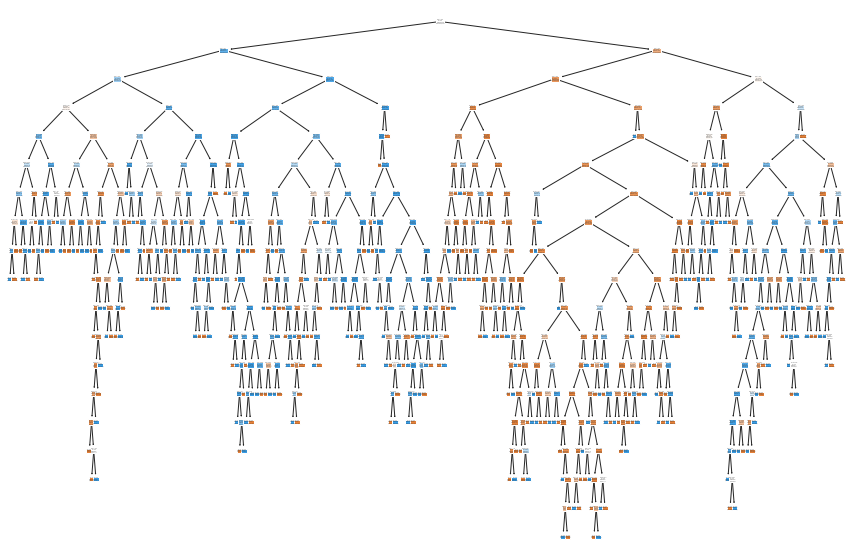

In [120]:
# visual representation of Decision Tree
plt.figure(figsize =(15,10))
tree.plot_tree(d_tree,filled = True)
plt.show()

### Parameter optimization of Decision tree.

In [121]:
# paramters of decision tree which is to be optimized.
Params = {'max_depth':[3,5,7,9,10],'max_leaf_nodes':[20,30,40,50,60],'min_samples_split':[15,30,50,60,80],'min_samples_leaf':[5,10,15,20,25]}

In [122]:
from sklearn.model_selection import GridSearchCV

In [123]:
grid_search = GridSearchCV(DecisionTreeClassifier(), Params, cv =5 )

In [124]:
grid_search.fit(bal_x_train,bal_y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [3, 5, 7, 9, 10],
                         'max_leaf_nodes': [20, 30, 40, 50, 60],
                         'min_samples_leaf': [5, 10, 15, 20, 25],
                         'min_samples_split': [15, 30, 50, 60, 80]})

In [125]:
# Best parameter combinations out of all possible combination.
grid_search.best_params_

{'max_depth': 10,
 'max_leaf_nodes': 60,
 'min_samples_leaf': 5,
 'min_samples_split': 15}

In [126]:
grid_search.best_score_

0.8919083969465648

In [127]:
grid_search.score(cleaned_xtest,y_test)

0.8923076923076924

#### Optimized Decision Tree model

In [128]:
opt_dt = DecisionTreeClassifier(max_depth=10, max_leaf_nodes = 60, min_samples_leaf = 5, min_samples_split =15,random_state=97)

In [129]:
opt_dt.fit(bal_x_train,bal_y_train)

DecisionTreeClassifier(max_depth=10, max_leaf_nodes=60, min_samples_leaf=5,
                       min_samples_split=15, random_state=97)

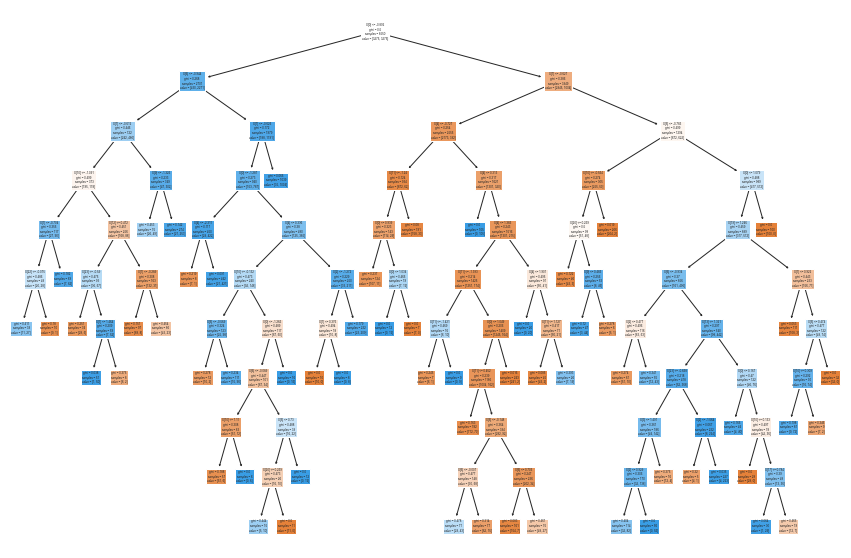

In [130]:
plt.figure(figsize =(15,10))
tree.plot_tree(opt_dt, filled = True)
plt.show()

In [131]:
# target prediction on test data.
opt_dt_ytest_pred = opt_dt.predict(cleaned_xtest)

#Targer prediction on training data.
opt_dt_ytrain_pred = opt_dt.predict(bal_x_train)

In [132]:
# classification report on training data.
print(classification_report(bal_y_train,opt_dt_ytrain_pred,target_names=['not churn','churn']))

              precision    recall  f1-score   support

   not churn       0.92      0.92      0.92      3275
       churn       0.92      0.92      0.92      3275

    accuracy                           0.92      6550
   macro avg       0.92      0.92      0.92      6550
weighted avg       0.92      0.92      0.92      6550



In [133]:
# classification report on testing data.
print(classification_report(y_test,opt_dt_ytest_pred,target_names=['not churn','churn']))

              precision    recall  f1-score   support

   not churn       0.96      0.91      0.93       712
       churn       0.62      0.80      0.70       133

    accuracy                           0.89       845
   macro avg       0.79      0.86      0.82       845
weighted avg       0.91      0.89      0.90       845



# Random Forest

In [134]:
from sklearn.ensemble import RandomForestClassifier

### Random forest with default parameter.

In [135]:
rf = RandomForestClassifier(random_state=99, oob_score=True)

In [136]:
rf.fit(bal_x_train,bal_y_train)

RandomForestClassifier(oob_score=True, random_state=99)

In [137]:
# target prediction on test data.
rf_ytest_pred = rf.predict(cleaned_xtest)

# target prediction on training data.
rf_ytrain_pred = rf.predict(bal_x_train)

In [138]:
# classification report on training data.
print(classification_report(bal_y_train,rf_ytrain_pred,target_names=['not churn','churn']))

              precision    recall  f1-score   support

   not churn       1.00      1.00      1.00      3275
       churn       1.00      1.00      1.00      3275

    accuracy                           1.00      6550
   macro avg       1.00      1.00      1.00      6550
weighted avg       1.00      1.00      1.00      6550



In [139]:
# classification report on testing data.
print(classification_report(y_test,rf_ytest_pred,target_names=['not churn','churn']))

              precision    recall  f1-score   support

   not churn       0.98      0.98      0.98       712
       churn       0.89      0.88      0.89       133

    accuracy                           0.96       845
   macro avg       0.94      0.93      0.93       845
weighted avg       0.96      0.96      0.96       845



In [140]:
# out of bag score.
rf.oob_score_

0.9804580152671756

In [141]:
# visualization of 50th tree.
ped = rf.estimators_[51]

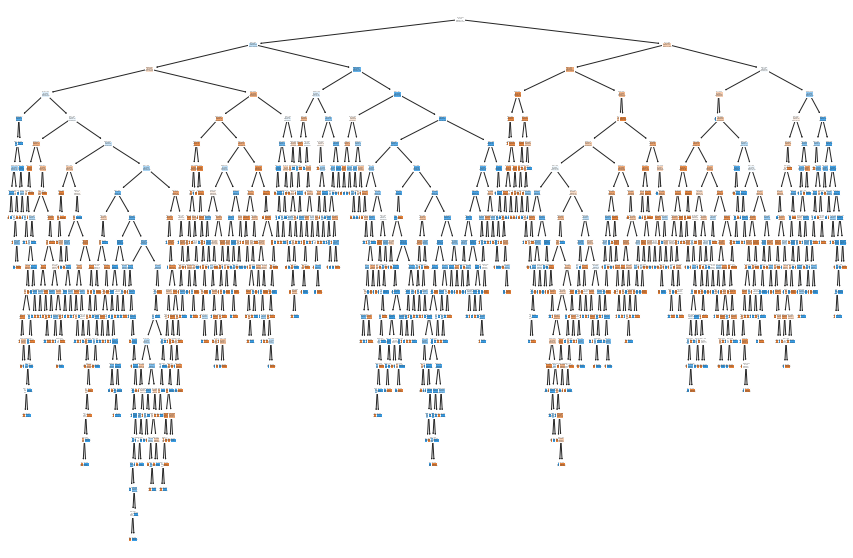

In [142]:
plt.figure(figsize =(15,10))
tree.plot_tree(ped,filled = True)
plt.show()

&nbsp;

## Parameter optimization of Random forest.

In [143]:
RandomForestClassifier().get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [144]:
parameter = {'max_depth':[3,5,7,9,10],'max_leaf_nodes':[20,30,40,50,60],'min_samples_split':[15,30,50,60,80],'min_samples_leaf':[5,10,15,20,25]}

In [145]:
grid_search_rf = GridSearchCV(RandomForestClassifier(), parameter, cv =5 )

In [146]:
grid_search_rf.fit(bal_x_train,bal_y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [3, 5, 7, 9, 10],
                         'max_leaf_nodes': [20, 30, 40, 50, 60],
                         'min_samples_leaf': [5, 10, 15, 20, 25],
                         'min_samples_split': [15, 30, 50, 60, 80]})

In [147]:
# Best parameter combinations out of all possible combination.
grid_search_rf.best_params_

{'max_depth': 9,
 'max_leaf_nodes': 60,
 'min_samples_leaf': 5,
 'min_samples_split': 15}

In [183]:
grid_search_rf.best_score_

0.9076335877862596

### Random forest with optimized parameter.

In [148]:
optimized_rf = RandomForestClassifier(max_depth=10, max_leaf_nodes =60, min_samples_leaf = 5, min_samples_split = 30)

In [149]:
optimized_rf.fit(bal_x_train,bal_y_train)

RandomForestClassifier(max_depth=10, max_leaf_nodes=60, min_samples_leaf=5,
                       min_samples_split=30)

In [150]:
# target prediction on test data.
optimized_rf_ytest_pred = optimized_rf.predict(cleaned_xtest)

#Targer prediction on training data.
optimized_rf_ytrain_pred = optimized_rf.predict(bal_x_train)

In [151]:
# classification report on training data.
print(classification_report(bal_y_train,optimized_rf_ytrain_pred,target_names=['not churn','churn']))

              precision    recall  f1-score   support

   not churn       0.92      0.93      0.92      3275
       churn       0.93      0.92      0.92      3275

    accuracy                           0.92      6550
   macro avg       0.92      0.92      0.92      6550
weighted avg       0.92      0.92      0.92      6550



In [152]:
# classification report on testing data.
print(classification_report(y_test,optimized_rf_ytest_pred,target_names=['not churn','churn']))

              precision    recall  f1-score   support

   not churn       0.97      0.92      0.94       712
       churn       0.65      0.85      0.74       133

    accuracy                           0.91       845
   macro avg       0.81      0.88      0.84       845
weighted avg       0.92      0.91      0.91       845



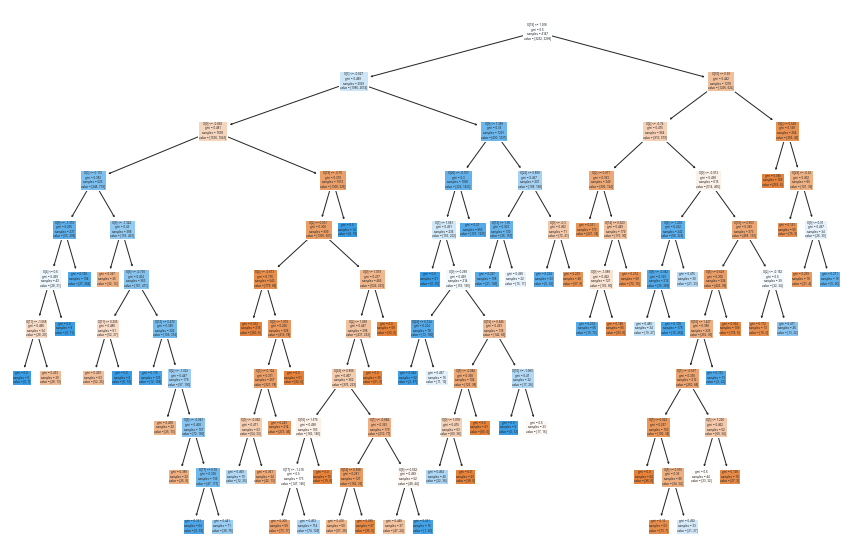

In [153]:
# visualization of 50th tree.
rf_ped = optimized_rf.estimators_[51]
plt.figure(figsize =(15,10))
tree.plot_tree(rf_ped,filled = True)
plt.show()

## Ada Boost Classifier

In [154]:
from sklearn.ensemble import AdaBoostClassifier

In [155]:
abc = AdaBoostClassifier()

In [156]:
abc.fit(bal_x_train,bal_y_train)

AdaBoostClassifier()

In [157]:
# target prediction on test data.
abc_ytest_pred = abc.predict(cleaned_xtest)

#Targer prediction on training data.
abc_ytrain_pred = abc.predict(bal_x_train)

In [158]:
# Classification report on training data.
print(classification_report(bal_y_train, abc_ytrain_pred,target_names=['not churn','churn']))

              precision    recall  f1-score   support

   not churn       0.90      0.90      0.90      3275
       churn       0.90      0.90      0.90      3275

    accuracy                           0.90      6550
   macro avg       0.90      0.90      0.90      6550
weighted avg       0.90      0.90      0.90      6550



In [159]:
# Classification report on test data.
print(classification_report(y_test,abc_ytest_pred,target_names=['not churn','churn']))

              precision    recall  f1-score   support

   not churn       0.96      0.90      0.93       712
       churn       0.59      0.78      0.67       133

    accuracy                           0.88       845
   macro avg       0.77      0.84      0.80       845
weighted avg       0.90      0.88      0.89       845



### Parameter optimization for AdaBoost classifier

In [160]:
# Dictionary of parameters which is to be optimized.
Parame = {'n_estimators':[30,50,60,70,80], 'learning_rate':[0.5,0.7,1.0,1.3,1.5,1.7,2.0]}

In [161]:
# Perform AdaBoost classifier on every possible combination of parameters.
grid_search_ada = GridSearchCV(AdaBoostClassifier(random_state=87), Parame, cv =5 )

In [162]:
grid_search_ada.fit(bal_x_train,bal_y_train)

GridSearchCV(cv=5, estimator=AdaBoostClassifier(random_state=87),
             param_grid={'learning_rate': [0.5, 0.7, 1.0, 1.3, 1.5, 1.7, 2.0],
                         'n_estimators': [30, 50, 60, 70, 80]})

In [163]:
# Best parameter combinations out of all possible combination.
grid_search_ada.best_params_

{'learning_rate': 1.3, 'n_estimators': 80}

In [164]:
 
grid_search_ada.best_score_

0.9009160305343512

In [165]:
grid_search_ada.score(cleaned_xtest,y_test)

0.9100591715976332

#### AdaBoost classifier with optimized parameter.

In [166]:
abc_opt = AdaBoostClassifier(learning_rate = 1.3, n_estimators = 80)

In [167]:
abc_opt.fit(bal_x_train,bal_y_train)

AdaBoostClassifier(learning_rate=1.3, n_estimators=80)

In [168]:
abc_opt_ytest_pred = abc_opt.predict(cleaned_xtest)
abc_opt_ytrain_pred = abc_opt.predict(bal_x_train)

In [169]:
# Classification report on training data.
print(classification_report(bal_y_train, abc_opt_ytrain_pred,target_names=['not churn','churn']))

              precision    recall  f1-score   support

   not churn       0.92      0.92      0.92      3275
       churn       0.92      0.92      0.92      3275

    accuracy                           0.92      6550
   macro avg       0.92      0.92      0.92      6550
weighted avg       0.92      0.92      0.92      6550



In [170]:
# Classification report on Test data.
print(classification_report(y_test,abc_opt_ytest_pred,target_names=['not churn','churn']))

              precision    recall  f1-score   support

   not churn       0.96      0.94      0.95       712
       churn       0.69      0.77      0.73       133

    accuracy                           0.91       845
   macro avg       0.82      0.85      0.84       845
weighted avg       0.92      0.91      0.91       845



&nbsp;

# Final interpretation.
- optimized Random forest works best.
- Recall 85% with 65% Precision on testing dataset.

In [191]:
Score = pd.DataFrame({'Model':['Logistic Regression','Logistic Regression','','Decision Tree','Decision Tree','','Optimized DT','Optimized DT','','Random Forest','Random Forest','','Optimized RF','Optimized RF','','Ada Boost','Ada Boost','','Optimized Ada Boost','Optimized Ada Boost'],'On':['Training Data','Testing Data','','Training Data','Testing Data','','Training Data','Testing Data','','Training Data','Testing Data','','Training Data','Testing Data','','Training Data','Testing Data','','Training Data','Testing Data'],'Recall':[84,88,'',100,86,'',92,80,'',100,88,'',92,85,'',90,78,'',92,77],'Precision':[83,50,'',100,78,'',92,62,'',100,89,'',93,65,'',90,59,'',92,69]})

In [192]:
Score

,Model,On,Recall,Precision
0,Logistic Regression,Training Data,84,83
1,Logistic Regression,Testing Data,88,50
2,,,,
3,Decision Tree,Training Data,100,100
4,Decision Tree,Testing Data,86,78
5,,,,
6,Optimized DT,Training Data,92,92
7,Optimized DT,Testing Data,80,62
8,,,,
9,Random Forest,Training Data,100,100
